In [1]:
import numpy as np
import os,sys
import subprocess as sp 

import pickle

import random
import time
import argparse


from os import listdir
from os.path import isfile, join

import networkx as nx


# %matplotlib inline
%matplotlib notebook

In [2]:
# load data
feff_data = pickle.load(open('feff.pkl', "rb")) 

In [96]:
def get_xmu(qm9id=None):
    
    for i,f in enumerate(feff_data):
        if f[0] == qm9id:
            xmu = f[1]
            break
    return xmu

<IPython.core.display.Javascript object>


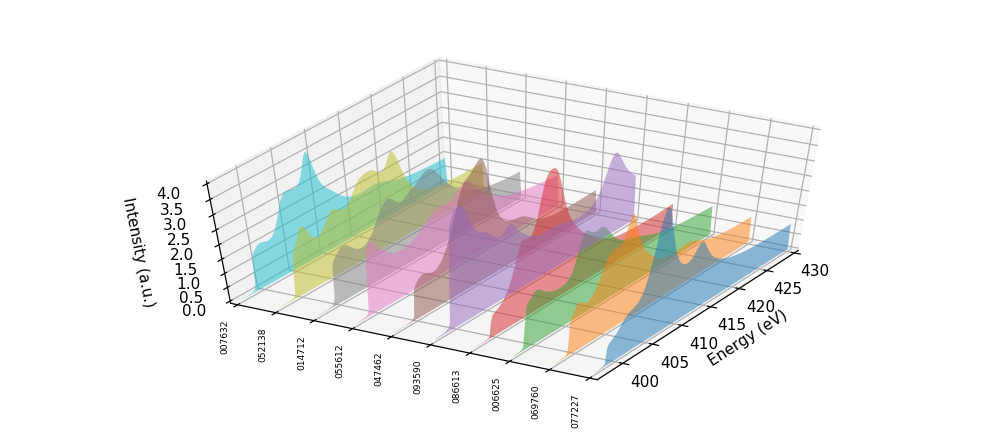

In [117]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection


def cc(arg):
    return mcolors.to_rgba(arg, alpha=0.9)


# qm9ids = ['000002','000190','091269','077227','069760','006625','086613']
qm9ids = []
for i in range(10):
    qm9ids.append(feff_data[i][0])
    

xmus = []
for i in qm9ids:
    xmus.append(get_xmu(i))


colors = []
verts = []
zs=[]
for i in range(len(xmus)):
    xs = xmus[i][0]
    ys = xmus[i][1]
    zs.append(i+1)
    ys[0], ys[-1] = 0, 0
    verts.append(list(zip(xs, ys)))
    colors.append('C'+str(i % 10))

facecolors=[]    
for i in colors:
    facecolors.append((cc(i)))
    
fig = plt.figure(figsize=(9,4))
ax = fig.add_subplot(111, projection='3d')

poly = PolyCollection(verts, facecolors=facecolors)
poly.set_alpha(0.5)
ax.add_collection3d(poly, zs=zs, zdir='y')




ax.set_xlabel('Energy (eV)')
ax.set_zlabel('Intensity (a.u.)')

ax.set_xlim3d(xs[0], xs[-1])
ax.set_ylim3d(1,zs[-1])
ax.set_yticks(zs)
ax.set_yticklabels(qm9ids,rotation=90,fontsize=6)
ax.set_zlim3d(0,4)
# ax.set_zticks([])
ax.view_init(elev=50, azim=-150)